# Double Pendulum Experiment Using Lagrangian Mechanics

The double pendulum consists of two masses `m1` and `m2`, attached to two rods of length `l1` and `l2`. The first rod is attached to a pivot, while the second rod is attached to the first mass. Both rods are assumed to be massless and rigid, and we are dealing with a planar system (motion is restricted to a plane).

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Assign Constants

Mass is given in kilograms and length is given meters. The gravitational constant remains `9.8` meters per second squared

In [2]:
g = 9.8  # gravitational acceleration (m/s^2)
l1 = 1.0  # length of the first rod (m)
l2 = 2.0  # length of the second rod (m)
m1 = 2.0  # mass of the first bob (kg)
m2 = 1.0  # mass of the second bob (kg)

# Initial conditions: [theta1, theta1_dot, theta2, theta2_dot]
initial_conditions = [np.pi / 2, 0, np.pi / 2, 0]  # start both at 90 degrees with no initial velocity

### Define Functions

Function returns infinitesimals of change in distance with time

In [3]:
def equations(t, y):
    theta1, z1, theta2, z2 = y

    # Define intermediate variables
    delta = theta2 - theta1

    # Equations of motion (derived using Euler-Lagrange)
    denominator1 = (m1 + m2) * l1 - m2 * l1 * np.cos(delta) ** 2
    denominator2 = (l2 / l1) * denominator1

    dtheta1_dt = z1
    dz1_dt = (m2 * l1 * z1 ** 2 * np.sin(delta) * np.cos(delta) +
              m2 * g * np.sin(theta2) * np.cos(delta) +
              m2 * l2 * z2 ** 2 * np.sin(delta) -
              (m1 + m2) * g * np.sin(theta1)) / denominator1

    dtheta2_dt = z2
    dz2_dt = (-m2 * l2 * z2 ** 2 * np.sin(delta) * np.cos(delta) +
              (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
              (m1 + m2) * l1 * z1 ** 2 * np.sin(delta) -
              (m1 + m2) * g * np.sin(theta2)) / denominator2

    return [dtheta1_dt, dz1_dt, dtheta2_dt, dz2_dt]

In [4]:
# Time points to solve for
t_span = (0, 25)  # simulate for 25 seconds
t_eval = np.linspace(0, 25, 1000)  # evaluate at 1000 points for smoother results

# Solve the system of ODEs using Runge-Kutta method (via scipy's solve_ivp)
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval)

# Extract results
theta1_sol = solution.y[0]
theta2_sol = solution.y[2]

### Plotting the Results

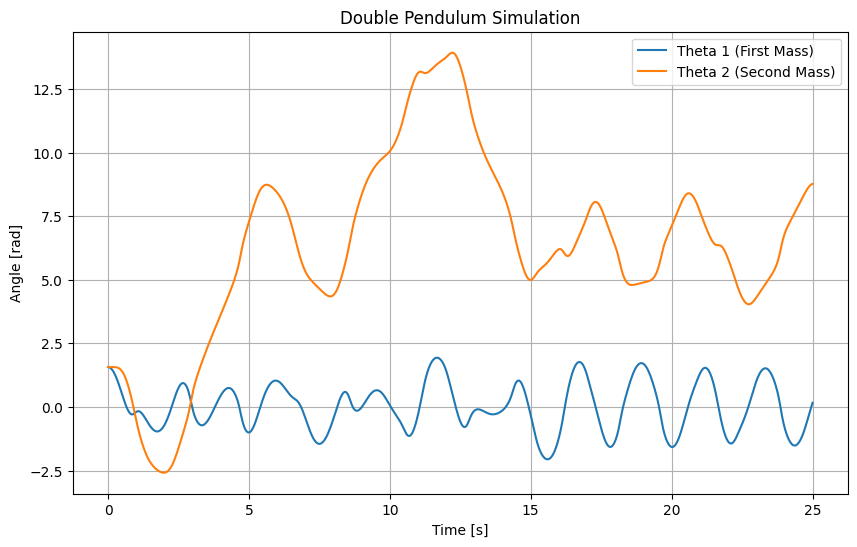

In [5]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_eval, theta1_sol, label="Theta 1 (First Mass)")
plt.plot(t_eval, theta2_sol, label="Theta 2 (Second Mass)")
plt.title('Double Pendulum Simulation')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.legend()
plt.grid()
plt.show()

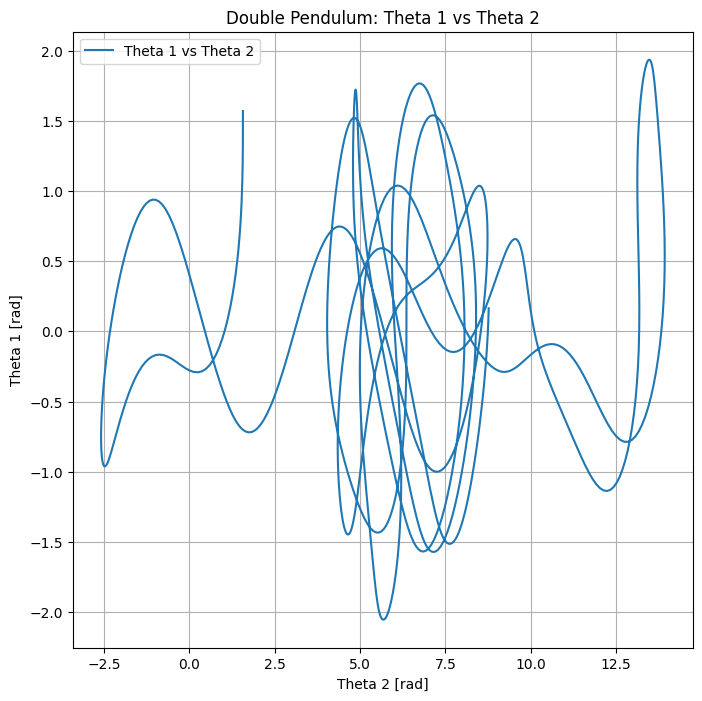

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(theta2_sol, theta1_sol, label="Theta 1 vs Theta 2")
plt.title('Double Pendulum: Theta 1 vs Theta 2')
plt.xlabel('Theta 2 [rad]')
plt.ylabel('Theta 1 [rad]')
plt.legend()
plt.grid()
plt.show()